## Day 18

https://adventofcode.com/2024/day/18

In [231]:
import re
import numpy as np
from queue import Queue

def read_input_18(filename):
    f = open(filename)
    return [ tuple([int(d) for d in re.findall(r"\d+",l) ]) for l in f.readlines() ]

CORRUPTED = 1

def drop_bytes(grid,byte,ndrop=12):
    for i in range(ndrop):
        x,y = byte[i]
        grid[y,x] = CORRUPTED
    return grid

def in_boundaries(p,grid):
    x,y = p
    return 0<=x<len(grid[0]) and 0<=y<len(grid)

def navigate_grid(grid,start,end):
    queue = Queue()
    queue.put((start,0))
    visited = {start}
    while not queue.empty():
        p, steps = queue.get()
        x,y = p
        for dx,dy in [ (1,0), (-1,0), (0,1), (0,-1) ]:
            p1 = x+dx, y+dy
            if not in_boundaries(p1,grid) or grid[y+dy][x+dx]==CORRUPTED or p1 in visited:
                continue
            if p1==end:
                return steps+1
            else:
                visited.add(p1)
                queue.put((p1,steps+1))
    return None

def part1(filename,size=6,ndrop=12):
    byte = read_input_18(filename)
    grid = np.zeros((size+1,size+1),dtype=int)
    grid = drop_bytes(grid,byte,ndrop=ndrop)
    plt.imshow(grid)
    return navigate_grid(grid,(0,0),(size,size))

Test 1: 22


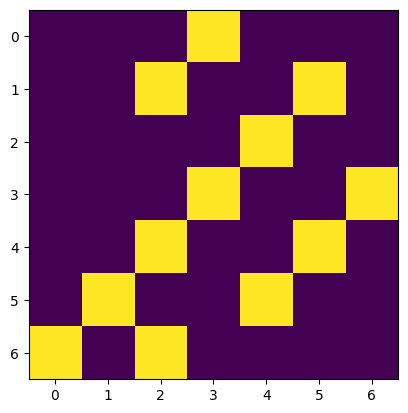

In [232]:
print("Test 1:",part1("examples/example18.txt",6,12))

Part 1: 354


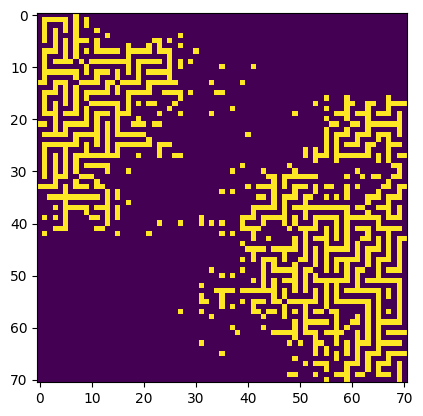

In [233]:
print("Part 1:",part1("AOC2024inputs/input18.txt",70,1024))

In [257]:
def part2_bruteforce(filename,size=6,ndropmin=12):
    byte = read_input_18(filename)
    # starting from maximum byte dropping!
    # (reaching search failure with many more bytes will be faster than finding path with few more bytes)
    for ndrop in range(len(byte)-1,ndropmin-1,-1): 
        grid = np.zeros((size+1,size+1),dtype=int)
        grid = drop_bytes(grid,byte,ndrop)
        steps = navigate_grid(grid,(0,0),(size,size))
        if steps:
            plt.imshow(grid)
            plt.show()
            return byte[ndrop]

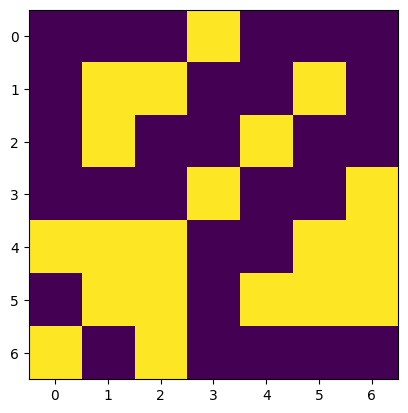

Test 2: (6, 1)


In [258]:
print("Test 2:",part2_bruteforce("examples/example18.txt",6,12))

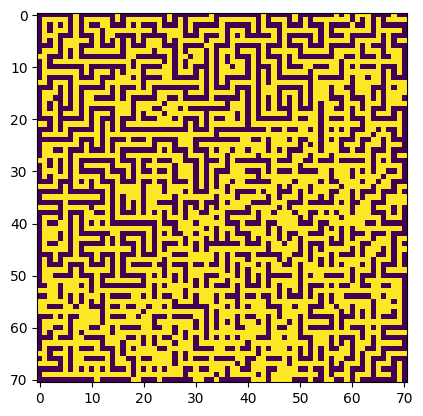

Part 2: (36, 17)


In [259]:
print("Part 2:",part2_bruteforce("AOC2024inputs/input18.txt",70,1024))